<a href="https://colab.research.google.com/github/luizfsjunior/data-science/blob/main/Analise_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255
testX = testX / 255 
trainY = np_utils.to_categorical(trainY, 10)
testY= np_utils.to_categorical(testY, 10)


In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from keras.layers import Dense, Dropout, BatchNormalization
from keras import layers

model = Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size = 64, validation_data=(testX, testY))

Epoch 1/100
782/782 [==============================] - 9s 12ms/step - loss: 0.1902 - accuracy: 0.6005 - val_loss: 0.1640 - val_accuracy: 0.6444
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1652 - accuracy: 0.6614 - val_loss: 0.1360 - val_accuracy: 0.7108
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1493 - accuracy: 0.7014 - val_loss: 0.1266 - val_accuracy: 0.7332
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1390 - accuracy: 0.7234 - val_loss: 0.1425 - val_accuracy: 0.7022
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1295 - accuracy: 0.7478 - val_loss: 0.1146 - val_accuracy: 0.7644
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1231 - accuracy: 0.7594 - val_loss: 0.1063 - val_accuracy: 0.7818
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.1175 - accuracy: 0.7732 - val_loss: 0.1053 - val_accuracy:

Text(0.5, 1.0, 'Loss ')

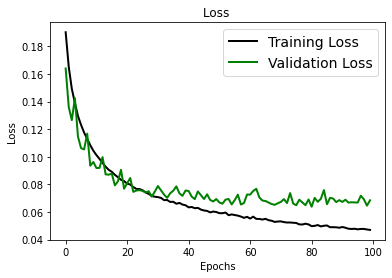

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss ', fontsize=12)

Text(0.5, 1.0, 'Accuracy ')

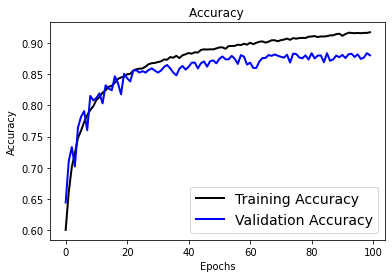

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy ', fontsize=12)